In [1]:
from ultralytics import YOLO
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.draw.color import Color, ColorPalette
from supervision.notebook.utils import show_frame_in_notebook

In [2]:
from ultralytics import YOLO
model = YOLO("./demo/data/models/license_plate_detector.pt")
model.fuse()
results = model("./demo/image.png", conf=0.25)
CLASS_NAMES_DICT = model.model.names
# model predictions to supervision Detections
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]

YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 d:\AIC\AIP\demo\image.png: 352x640 2 license_plates, 72.2ms
Speed: 4.8ms preprocess, 72.2ms inference, 5.7ms postprocess per image at shape (1, 3, 352, 640)


In [10]:
model.predict("./demo/image.png", conf=0.25)


image 1/1 d:\AIC\AIP\demo\image.png: 352x640 2 license_plates, 66.3ms
Speed: 2.0ms preprocess, 66.3ms inference, 0.0ms postprocess per image at shape (1, 3, 352, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [ 80,  86,  85],
         [ 79,  85,  84],
         [ 79,  85,  84]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [ 80,  86,  85],
         [ 79,  85,  84],
         [ 78,  84,  83]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [ 80,  86,  85],
         [ 79,  85,  84],
         [ 78,  84,  83]],
 
        ...,
 
        [[243, 241, 240],
         [244, 242, 241],
         [244, 242, 241],
         ...,
         [131, 126, 123],
         [129, 124, 121],
         [127, 122, 119]],
 
        [[243, 241, 240],
         [242, 240, 239],
         [242, 240, 239],
         ...,
         [1

In [11]:
from app.models.ai_model import Model
model = Model()

2025-01-12 14:40:44.205 | INFO     | app.models.ai_model:init:42 - model initiation....
2025-01-12 14:40:48.773 | INFO     | app.models.ai_model:init:46 - model init successful


In [2]:
SOURCE_VIDEO_PATH = "./demo/image.png"
# model.ocr_model.predict(SOURCE_VIDEO_PATH)

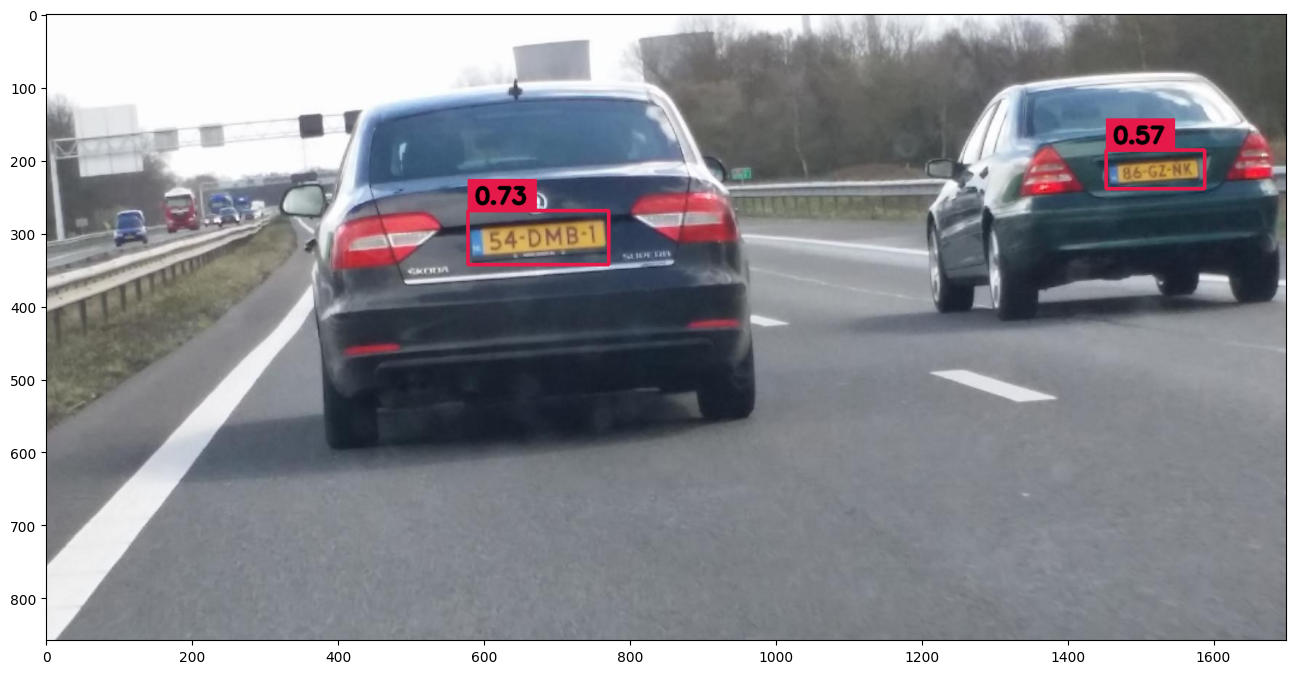

In [12]:
import cv2
SOURCE_VIDEO_PATH = "./demo/image.png"
# Đọc ảnh từ đường dẫn
frame = cv2.imread(SOURCE_VIDEO_PATH)
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=1)
# annoate and display frame
%matplotlib inline
frame_ = frame.copy()
frame_ = box_annotator.annotate(frame=frame_, detections=detections, labels=None)
show_frame_in_notebook(frame_, (16, 16))

In [13]:
from paddleocr import PaddleOCR
ocr_model = PaddleOCR(lang='en', show_log=False, use_angle_cls=True, use_gpu=False)

In [14]:
license_plate_detector = YOLO("./demo/data/models/license_plate_detector.pt")

In [15]:
from demo.modules.plate_recognition import PlateRecognizer
plate_recognizer = PlateRecognizer(license_plate_detector, ocr_model)

In [20]:
results[0].boxes.data.shape

torch.Size([2, 6])

In [21]:
import numpy as np

for data in results.boxes.data.cpu().numpy():
    x1, y1, x2, y2, car_conf, label = data
    car_frame = frame[int(y1):int(y2), int(x1):int(x2)]
    plates = license_plate_detector(car_frame, conf=0.2)
    if plates[0]:
        x1_, y1_, x2_, y2_, plate_conf, label = plates[0].boxes.data.cpu().numpy()[0]
        plate_frame = car_frame[int(y1_):int(y2_), int(x1_):int(x2_)]
        result = ocr_model.ocr(plate_frame, cls=True)
        if result:
            info = result[0][0][-1]
            print(f"Licence Plate: {info[0]}, Conf: {info[1]}, Car_conf: {car_conf}, Plate_conf: {plate_conf}")

            # Visualize the plates
            text = f"[{info[0]}] Conf: {info[1]:0.2f}"
            frame_ = plate_recognizer.annotate(frame_, np.array([x1, y1, x2, y2]), text)
        else:
            print(f"None, Car_conf: {car_conf}, Plate_conf: {plate_conf}")
        print("-"*80)

AttributeError: 'list' object has no attribute 'boxes'

In [19]:
result[0][0][-1][1]

0.9371470212936401

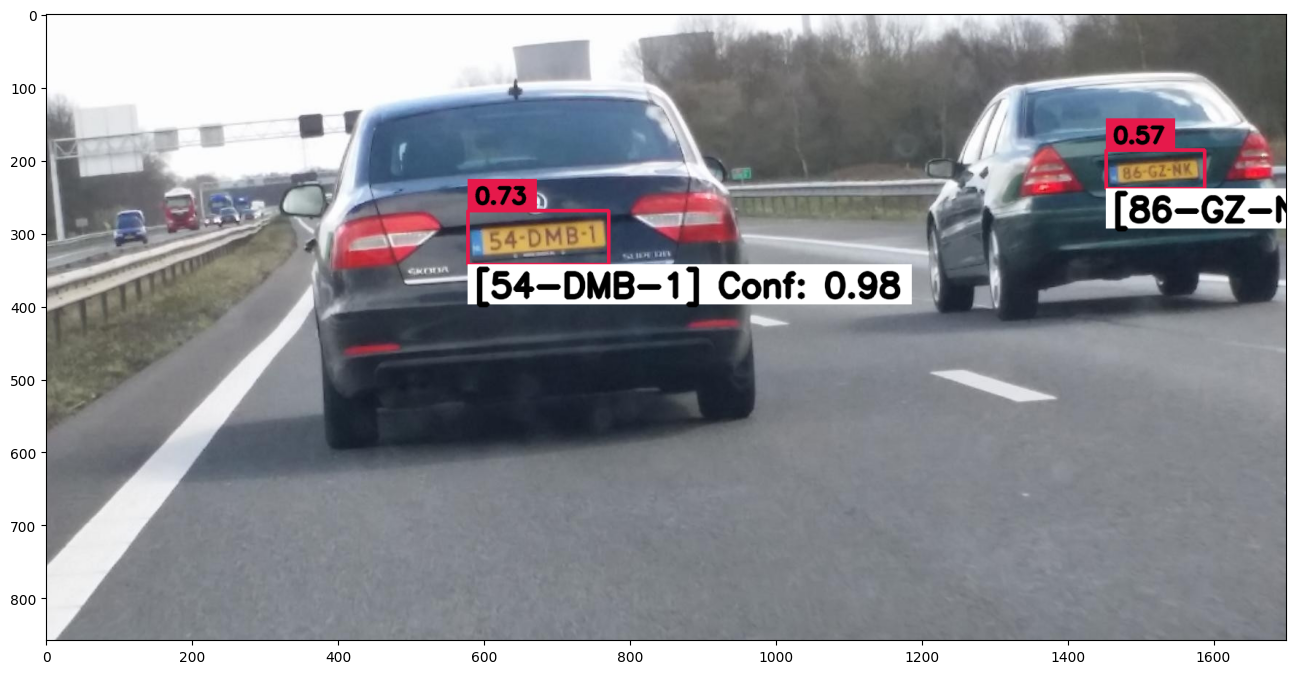

In [16]:
show_frame_in_notebook(frame_, (16, 16))

In [1]:
from app.controllers.ai_controller import AIController
ai = AIController()

2025-01-12 14:29:54.093 | INFO     | app.models.ai_model:init:42 - model initiation....
2025-01-12 14:29:59.282 | INFO     | app.models.ai_model:init:46 - model init successful


In [ ]:
import cv2
SOURCE_VIDEO_PATH = "./demo/image.png"
# Đọc ảnh từ đường dẫn
frame = cv2.imread(SOURCE_VIDEO_PATH)
result_detect = ai.inference_detect(frame)
fr = ai.inference_ocr(result_detect, frame)

In [ ]:
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
for data in result_detect.boxes.data.cpu().numpy():
    x1, y1, x2, y2, car_conf, label = data
    plate_frame = frame[int(y1):int(y2), int(x1):int(x2)]
    result = ai.ocr_model.ocr(plate_frame, cls=True)
    if result:
        info = result[0][0][-1]
        print(f"Licence Plate: {info[0]}, Conf: {info[1]}, Car_conf: {car_conf}, Plate_conf: {info[1]}")
        # Visualize the result_detect
        text = f"[{info[0]}] Conf: {info[1]:0.2f}"
        detections = Detections(
        xyxy=results[0].boxes.xyxy.cpu().numpy(),
        confidence=results[0].boxes.conf.cpu().numpy(),
        class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        frame = ai.box_annotator.annotate(frame, np.array([x1, y1, x2, y2]), text)


In [21]:
xyxy_list = []
conf_list = []
text_list = []
class_id_list = []
for data in result_detect.boxes.data.cpu().numpy():
    x1, y1, x2, y2, car_conf, label = data
    plate_frame = frame[int(y1):int(y2), int(x1):int(x2)]
    result = ai.ocr_model.ocr(plate_frame, cls=True)
    if result:
        info = result[0][0][-1]
        print(f"Licence Plate: {info[0]}, Conf: {info[1]}, Car_conf: {car_conf}, Plate_conf: {info[1]}")
        # Visualize the result_detect
        text = f"[{info[0]}] Conf: {info[1]:0.2f}"
        xyxy_list.append([x1, y1, x2, y2])
        conf_list.append(car_conf)
        text_list.append(info[0])
        class_id_list.append(label)
detections = Detections(
xyxy=np.array(xyxy_list),
confidence=np.array(conf_list),
class_id=np.array(class_id_list).astype(int)
)
frame = ai.box_annotator.annotate(frame, detections, text_list)

Licence Plate: 54-DMB-1, Conf: 0.9767718315124512, Car_conf: 0.73486328125, Plate_conf: 0.9767718315124512
Licence Plate: 86-GZ-NK, Conf: 0.9368371963500977, Car_conf: 0.56591796875, Plate_conf: 0.9368371963500977


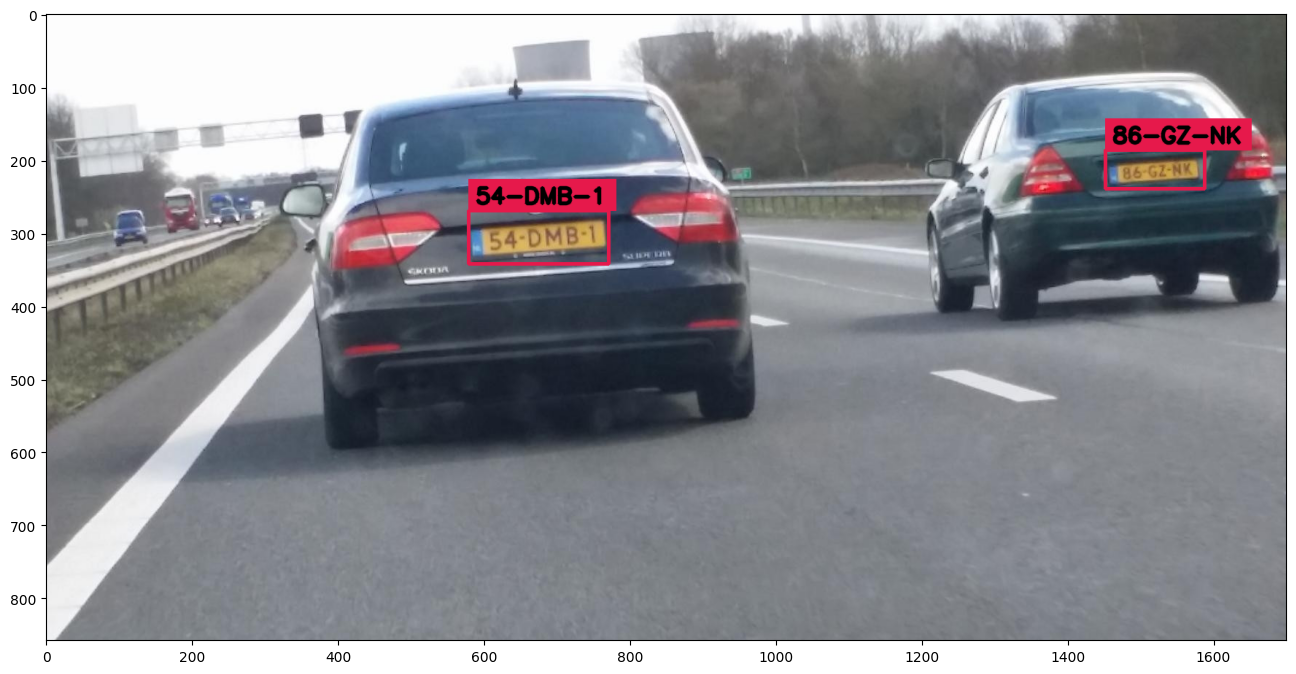

In [23]:
show_frame_in_notebook(frame, (16, 16))

In [2]:
import logging
import math

from tqdm import tqdm
import numpy as np
from collections import deque
from supervision.video.sink import VideoSink
from deep_sort_realtime.deepsort_tracker import DeepSort
from paddleocr import PaddleOCR
from ultralytics import YOLO

from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.geometry.dataclasses import Point
from supervision.draw.color import ColorPalette

from demo.modules.plate_recognition import PlateRecognizer
from demo.modules.speed_estimation import SpeedEstimator
from demo.modules.annotation import NoteAnnotator, TraceAnnotator

log = logging.getLogger(__name__)
# camera:
#   L0: 0.2
#   f1: 928.7943
#   f2: -67.777
#   s_x: 0.64
#   s_y: 3
#   V0: 75.0
#   y_min: 750.0
#   y_max: 2500.0
# models:
#   vehicle_detector_path: "./data/models/yolov8x.pt"
#   plate_detector_path: "./data/models/license_plate_detector.pt"


class VideoProcessor:
    def __init__(self, source_video_path, target_video_path):
        """
        Initialize the VideoProcessor.

        Args:
            source_video_path (str): Path to the source video.
            target_video_path (str): Path to the target video.
            cfg (dict): Configuration dictionary.
        """
        self.source_video_path = source_video_path
        self.target_video_path = target_video_path
        self.V0 = 75.0
        self.y_min = 750.0
        self.data_tracker = {}
        self.CLASS_ID = [2, 3, 5, 7]

    def setup(self):
        """
        Set up the video processing environment and initialize necessary components.
        """
        # Initialize the vehicle detection/ plate detection/ paddleOCR models
        self.vehicle_detector = YOLO("yolov8s.pt")
        self.plate_detector = YOLO("./demo/data/models/license_plate_detector.pt")
        self.ocr_model = PaddleOCR(lang='en', show_log=False, use_angle_cls=True, use_gpu=False)

        # Initialize the tracker
        self.object_tracker = DeepSort(max_age=20,
                                        n_init=2,
                                        nms_max_overlap=1.0,
                                        max_cosine_distance=0.3,
                                        nn_budget=None,
                                        override_track_class=None,
                                        embedder="mobilenet",
                                        half=True,
                                        bgr=True,
                                        embedder_gpu=True,
                                        embedder_model_name=None,
                                        embedder_wts=None,
                                        polygon=False,
                                        today=None)

        # Create an ID dictionary for each vehicle type
        self.CLASS_DICT = {}
        for id in self.CLASS_ID:
            self.CLASS_DICT[id] = self.vehicle_detector.model.names[id]

        # Create VideoInfo instance, frame generator
        self.video_info = VideoInfo.from_video_path(self.source_video_path)
        self.generator = get_video_frames_generator(self.source_video_path)

        # Create LineCounter instance
        width, height = self.video_info.resolution
        LINE_START = Point(50, int(height * 0.6))
        LINE_END = Point(width - 50, int(height * 0.6))
        self.line_counter = LineCounter(start=LINE_START, end=LINE_END)

        # Create instance of BoxAnnotator and LineCounterAnnotator
        self.box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=1)
        self.line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

        # Create instance of PlateRecognizer and SpeedEstimator
        self.plate_recognizer = PlateRecognizer(license_plate_detector=self.plate_detector, ocr_model=self.ocr_model)

        # Create instance of NoteAnnotator and NoteAnnotator
        self.note_annotator = NoteAnnotator(color_dict=self.CLASS_DICT)
        self.trace_annotator = TraceAnnotator()

        # Calculate the scale of our own frame compared to 720p (1280 x 720px)
        self.scale = math.sqrt(width * height / 1280 / 720)

    def process_video(self):
        """
        Process the video, including detection, tracking, speed estimation, vehicle counting and annotation.
        """
        with VideoSink(self.target_video_path, self.video_info) as sink:
            frame_count = 0
            for frame in tqdm(self.generator, total=self.video_info.total_frames):
                # Draw notes in the upper left of the frame
                self.note_annotator.annotate(frame)

                # Detect vehicle on a single frame
                results = self.vehicle_detector(frame, conf=0.6)

                # Tracking detections
                dets = []
                for x1, y1, x2, y2, conf, id in results[0].boxes.data.cpu().numpy():
                    if id in self.CLASS_ID:
                        dets.append(([int(x1), int(y1), int(x2 - x1), int(y2 - y1)], conf, id))

                if dets:
                    tracks = self.object_tracker.update_tracks(dets, frame=frame)
                    track_info = [(track.to_tlbr(), track.get_det_conf(), track.get_det_class(), track.track_id)
                                for track in tracks]
                    track_dets, track_confs, track_classes, track_ids = zip(*track_info)
                    mask = np.array([conf is not None for conf in track_confs])

                    if len(track_dets) > 0:
                        detections = Detections(
                            xyxy=np.array(track_dets),
                            confidence=np.array(track_confs),
                            class_id=np.array(track_classes).astype(int),
                            tracker_id=np.array(track_ids).astype(int)
                        )

                        # Filter not confirmed
                        detections.filter(mask=mask, inplace=True)

                        labels = []
                        for xyxy, confidence, class_id, tracker_id in detections:
                            if tracker_id not in self.data_tracker:
                                # Initialize the tracker state
                                # if it doesn't exist [speed, step, frame_count, center_points_buffer, plate, ocr_conf]
                                self.data_tracker[tracker_id] = [self.V0, 0, frame_count, deque(maxlen=64), None, 0]

                            # Add center_point to buffer
                            x1, y1, x2, y2 = [int(i) for i in xyxy]
                            center_point = (int((x2 + x1) / 2), int((y1 + y2) / 2))
                            self.data_tracker[tracker_id][3].appendleft(center_point)

                            speed_label = ""
                            tracker_state = self.data_tracker[tracker_id]
                            # Check y threshold for speed estimation and plate detection
                            if xyxy[1] > self.y_min:
                                prev_speed = tracker_state[0]
                                step = tracker_state[1]
                                frame_num = frame_count - tracker_state[2]

                                # Estimate the speed of vehicle
                                if step == 0:
                                    tracker_state[1] += 1
                                    tracker_state[2] = frame_count
                                else:
                                    # Calculate the box velocities
                                    data_deque = self.data_tracker[tracker_id][3]
                                    box_vel = np.array(data_deque[0]) - np.array(data_deque[1])

                                    # Calculate the new speed
                                    speed = 0

                                    # Update the tracker_state
                                    tracker_state[0] = speed
                                    tracker_state[1] += 1
                                    tracker_state[2] = frame_count

                                    # Update speed label
                                    speed_label = f" | Speed: {tracker_state[0]:0.2f} mph"

                                # Recognize plate
                                plate, ocr_conf = self.plate_recognizer.detect(frame, xyxy)
                                if plate is not None and ocr_conf > tracker_state[-1]:
                                    tracker_state[-2], tracker_state[-1] = plate, ocr_conf

                                # Visualize plate
                                if tracker_state[-2] is not None:
                                    text = f"[{tracker_state[-2]}] Conf: {tracker_state[-1]:0.2f}"
                                    frame = self.plate_recognizer.annotate(frame, xyxy, text)

                            # Update labels
                            labels.append(
                                f"[{tracker_id}] {self.CLASS_DICT[class_id].capitalize()} "
                                f"| Conf: {confidence:0.2f}" + speed_label)

                            # Annotate tracking trail
                            self.trace_annotator.annotate(frame, tracker_state[3], class_id)

                        # Update line counter
                        self.line_counter.update(detections=detections)

                # Annotate and display frame
                frame = self.box_annotator.annotate(frame=frame, detections=detections, labels=labels)
                self.line_annotator.annotate(frame=frame, line_counter=self.line_counter)

                frame_count += 1
                sink.write_frame(frame)

        log.info("___________________________DONE___________________________")


In [ ]:
import os 
from datetime import datetime
import cv2
from app.database.db import SessionLocal, insert_row
from app.models.violation_model import Violation
from supervision.notebook.utils import show_frame_in_notebook
from datetime import datetime
from app.database.db import SessionLocal, insert_row
from app.models.violation_model import Violation

db_session = SessionLocal()

# Tạo một bản ghi mới

video_process = VideoProcessor(source_video_path="./demo/data/models/vehicle-counting.mp4",target_video_path="./video.mp4")
video_process.setup()
frames_path = './output_frames/'
list_frame = os.listdir(frames_path)
frame_count = 0
frame_out_result = []
for frame_path in list_frame:
    frame = cv2.imread(frames_path+frame_path)
    video_process.note_annotator.annotate(frame)

    # Detect vehicle on a single frame
    results = video_process.vehicle_detector(frame, conf=0.6)

    # Tracking detections
    dets = []
    for x1, y1, x2, y2, conf, id in results[0].boxes.data.cpu().numpy():
        if id in video_process.CLASS_ID:
            dets.append(([int(x1), int(y1), int(x2 - x1), int(y2 - y1)], conf, id))

    if dets:
        tracks = video_process.object_tracker.update_tracks(dets, frame=frame)
        track_info = [(track.to_tlbr(), track.get_det_conf(), track.get_det_class(), track.track_id)
                    for track in tracks]
        track_dets, track_confs, track_classes, track_ids = zip(*track_info)
        mask = np.array([conf is not None for conf in track_confs])

        if len(track_dets) > 0:
            detections = Detections(
                xyxy=np.array(track_dets),
                confidence=np.array(track_confs),
                class_id=np.array(track_classes).astype(int),
                tracker_id=np.array(track_ids).astype(int)
            )

            # Filter not confirmed
            detections.filter(mask=mask, inplace=True)

            labels = []
            for xyxy, confidence, class_id, tracker_id in detections:
                if tracker_id not in video_process.data_tracker:
                    # Initialize the tracker state
                    # if it doesn't exist [[is_violate, end_state], step, frame_count, center_points_buffer, plate, ocr_conf]
                    video_process.data_tracker[tracker_id] = [[False,False], 0, frame_count, deque(maxlen=64), None, 0]

                # Add center_point to buffer
                x1, y1, x2, y2 = [int(i) for i in xyxy]
                center_point = (int((x2 + x1) / 2), int((y1 + y2) / 2))
                video_process.data_tracker[tracker_id][3].appendleft(center_point)

                tracker_state = video_process.data_tracker[tracker_id]
                
                # Check y threshold for speed estimation and plate detection
                if xyxy[1] > video_process.y_min:
                    if class_id == 2: #REPLACE WITH NOT HELMET
                        tracker_state[0][0] = True
                        
                    tracker_state[1] += 1
                    tracker_state[2] = frame_count
                    # Recognize plate
                    plate, ocr_conf = video_process.plate_recognizer.detect(frame, xyxy)
                    if plate is not None and ocr_conf > tracker_state[-1]:
                        tracker_state[-2], tracker_state[-1] = plate, ocr_conf

                    # Visualize plate
                    if tracker_state[-2] is not None:
                        text = f"[{tracker_state[-2]}] Conf: {tracker_state[-1]:0.2f}"
                        frame = video_process.plate_recognizer.annotate(frame, xyxy, text)

                # Update labels
                labels.append(
                    f"[{tracker_id}] {video_process.CLASS_DICT[class_id].capitalize()} "
                    f"| Conf: {confidence:0.2f}")

                # Annotate tracking trail
                video_process.trace_annotator.annotate(frame, tracker_state[3], class_id)

            # Update line counter
            video_process.line_counter.update(detections=detections)
    if frame_count % 10 == 0:
        for tracker_id in list(video_process.data_tracker.keys()):
            tracker_state = video_process.data_tracker[tracker_id]
            last_seen_frame = tracker_state[2]
            if frame_count - last_seen_frame > 5 and tracker_state[0][0] == True:
                tracker_state[0][1] = True  # end_state = True
                plate = tracker_state[-2]
                new_violation = Violation(
                    id_detect = tracker_id,
                    license_plate=plate,
                    timestamp=datetime.now(),
                    image_path="/path/to/image.jpg"
                )
                insert_row(db_session, 
                        Violation(
                        id_detect = int(tracker_id),
                        license_plate=plate,
                        timestamp=datetime.now(),
                        image_path="/path/to/image.jpg"
                        ))
                del video_process.data_tracker[tracker_id]
    # Annotate and display frame
    frame = video_process.box_annotator.annotate(frame=frame, detections=detections, labels=labels)
    frame_out_result.append(frame)
    frame_count += 1
show_frame_in_notebook(frame, (16, 16))

In [32]:
for tracker_id in list(video_process.data_tracker.keys()):
    tracker_state = video_process.data_tracker[tracker_id]
    last_seen_frame = tracker_state[2]
    if frame_count - last_seen_frame > 5 and tracker_state[0][0] == True:
        tracker_state[0][1] = True  # end_state = True
        plate = tracker_state[-2]
        new_violation = Violation(
            id_detect = tracker_id,
            license_plate=plate,
            timestamp=datetime.now(),
            image_path="/path/to/image.jpg"
        )
        insert_row(db_session, 
                Violation(
                id_detect = tracker_id,
                license_plate=plate,
                timestamp=datetime.now(),
                image_path="/path/to/image.jpg"
                ))

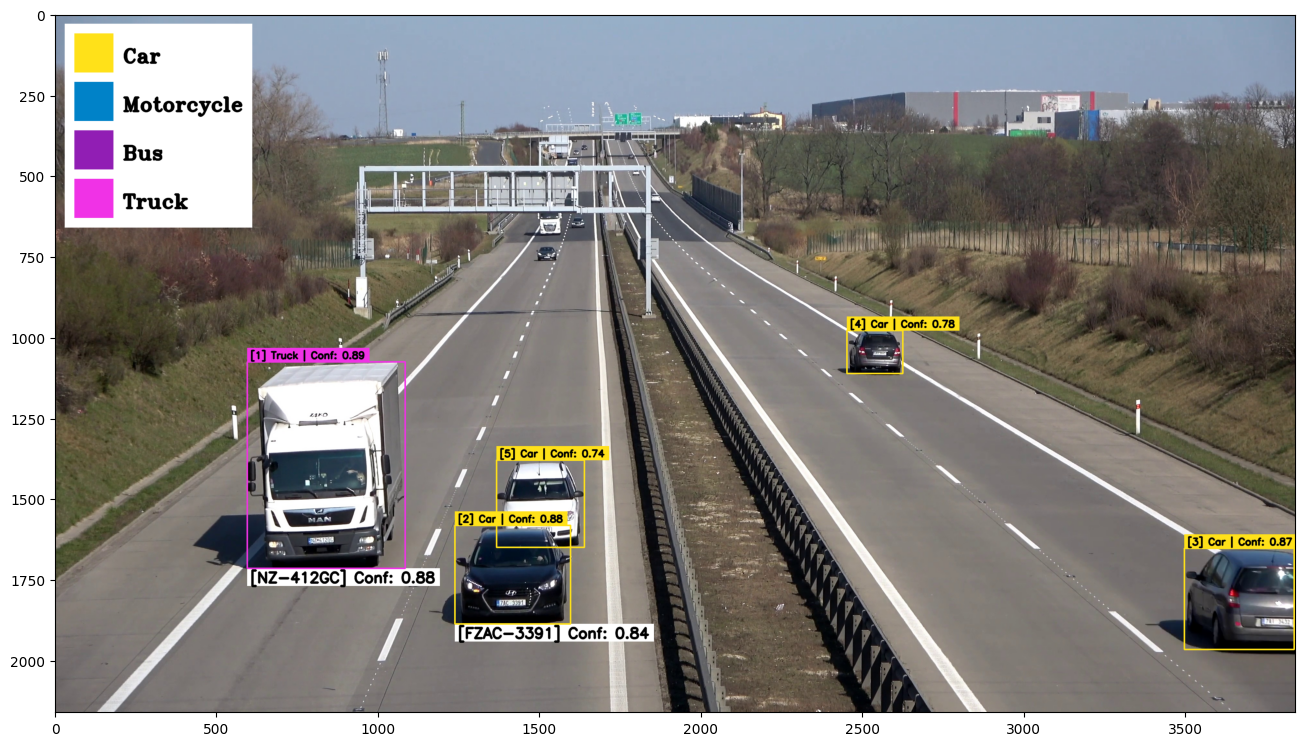

In [31]:
show_frame_in_notebook(frame_out_result[0], (16, 16))

In [3]:
from app.database.db import SessionLocal, engine, Base
from app.models.violation_model import Violation

# Tạo tất cả các bảng được định nghĩa trong Base
def create_tables():
    Base.metadata.create_all(bind=engine)

if __name__ == "__main__":
    create_tables()
    print("Tables created successfully!")

Tables created successfully!


In [15]:
import cv2
import os

# Đường dẫn tới video
video_path = "./demo/data/models/vehicle-counting.mp4"
output_folder = "./output_frames"  # Thư mục lưu các frame cắt
os.makedirs(output_folder, exist_ok=True)

# Mở video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Không thể mở video.")
    exit()

frame_count = 0
saved_frame_count = 0

while frame_count < 100:
    ret, frame = cap.read()
    if not ret:
        print("Đã đọc hết video hoặc lỗi đọc video.")
        break

    # Lưu frame mỗi 5 frame
    if frame_count % 5 == 0:
        output_path = os.path.join(output_folder, f"frame_{frame_count:03d}.jpg")
        cv2.imwrite(output_path, frame)
        saved_frame_count += 1
        print(f"Đã lưu: {output_path}")

    frame_count += 1

cap.release()
print(f"Hoàn tất! Đã lưu {saved_frame_count} frame.")


Đã lưu: ./output_frames\frame_000.jpg
Đã lưu: ./output_frames\frame_005.jpg
Đã lưu: ./output_frames\frame_010.jpg
Đã lưu: ./output_frames\frame_015.jpg
Đã lưu: ./output_frames\frame_020.jpg
Đã lưu: ./output_frames\frame_025.jpg
Đã lưu: ./output_frames\frame_030.jpg
Đã lưu: ./output_frames\frame_035.jpg
Đã lưu: ./output_frames\frame_040.jpg
Đã lưu: ./output_frames\frame_045.jpg
Đã lưu: ./output_frames\frame_050.jpg
Đã lưu: ./output_frames\frame_055.jpg
Đã lưu: ./output_frames\frame_060.jpg
Đã lưu: ./output_frames\frame_065.jpg
Đã lưu: ./output_frames\frame_070.jpg
Đã lưu: ./output_frames\frame_075.jpg
Đã lưu: ./output_frames\frame_080.jpg
Đã lưu: ./output_frames\frame_085.jpg
Đã lưu: ./output_frames\frame_090.jpg
Đã lưu: ./output_frames\frame_095.jpg
Hoàn tất! Đã lưu 20 frame.
